In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ctrl_dim = 3  # Number of control signals
num_t = 100  # Number of time steps
num_magnus_t = 10  # Number of time steps in each Magnus interval

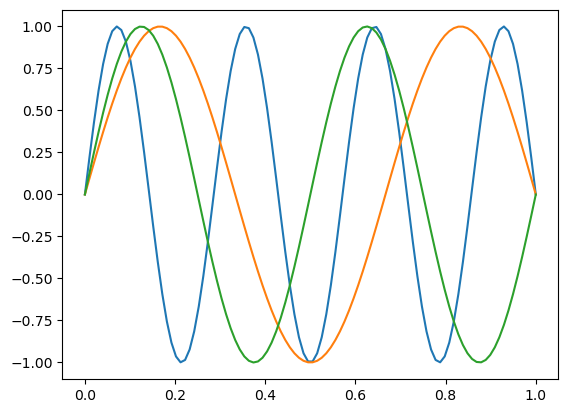

In [3]:
tlist = np.linspace(0, 1, num_t)
ctrl_vec = np.sin(np.pi * np.asarray([7, 3, 4])[:, None] * tlist)
plt.plot(tlist, ctrl_vec.T)

In [4]:
folded_ctrl_vec = ctrl_vec.reshape(ctrl_dim, -1, num_magnus_t)
num_magnus_intervals = folded_ctrl_vec.shape[1]

(3, 10)

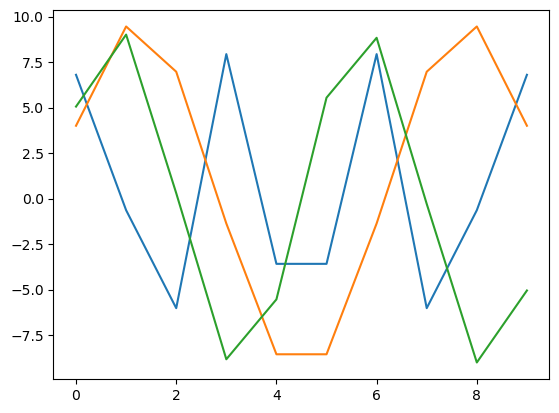

In [10]:
magnus1 = folded_ctrl_vec.sum(axis=-1)
plt.plot(magnus1.T)
magnus1.shape

(3, 10)

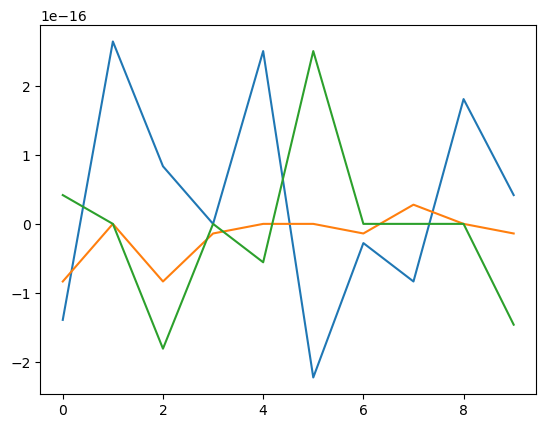

In [6]:
magnus21 = 0.25 * (
    (folded_ctrl_vec[:, :, :, None] - folded_ctrl_vec[:, :, None, :])
    .reshape(ctrl_dim, num_magnus_intervals, -1)
    .sum(axis=-1)
)
plt.plot(magnus21.T)
magnus21.shape

In [7]:
(folded_ctrl_vec[None, :, :, :, None] * folded_ctrl_vec[:, None, :, None, :]).shape

(3, 3, 10, 10, 10)

In [8]:
magnus22 = 0.25 * (
    folded_ctrl_vec[None, :, :, :, None] * folded_ctrl_vec[:, None, :, None, :]
    - folded_ctrl_vec[:, None, :, :, None] * folded_ctrl_vec[None, :, :, None, :]
).reshape(ctrl_dim, ctrl_dim, num_magnus_intervals, -1).sum(axis=-1)
magnus22.shape  # .shape

(3, 3, 10)

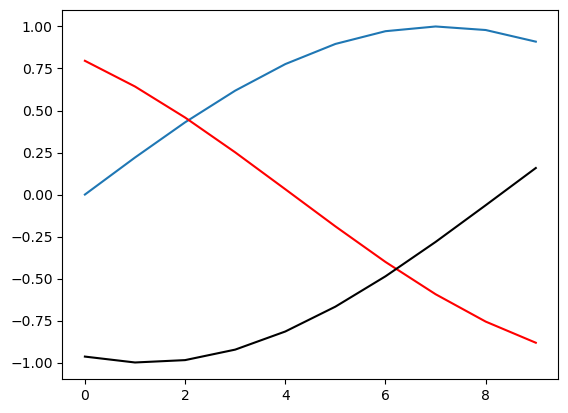

In [9]:
plt.plot(folded_ctrl_vec[0, 0, :])
plt.plot(folded_ctrl_vec[0, 1, :], "r-")
plt.plot(folded_ctrl_vec[0, 2, :], "k-")

In [5]:
import cupy as cp
import cupyx.scipy.linalg as csl

matarr = cp.random.random((4, 3, 3))
csl.expm(matarr)

ValueError: Input must be 1- or 2-d.